# Assignment 3

**Submission deadlines:**

  - Tuesday groups: 22.04.2025
  - Friday groups: 18.04.2025

**Points:** Aim to get 10 points + 4 extra

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`

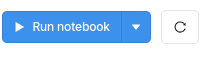

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Classify the Oxford Flowers dataset (Weight & Biases) [6p]

In this task, you will train a convolutional neural network to classify images of flowers from the [Oxford Flowers 102 dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/). The dataset consists of 102 flower categories, and each class has between 40 and 258 images. The images have large scale, pose, and light variations. In addition, there are categories that have large variations within the category and several very similar categories.

    
The dataset is available in `torchvision.datasets.Flowers102` class; see [Flowers102.html](https://pytorch.org/vision/main/generated/torchvision.datasets.Flowers102.html). You can use the following code to load the dataset:

```python
import torchvision
import torchvision.transforms as transforms

dataset = torchvision.datasets.Flowers102(root='./data', download=True, transform=transforms.ToTensor())
```

**Hint**: The default split of the dataset is 1020, 1020 and 6149 images for training, validation and test sets respectively.
If you can handle the bigger training dataset, you can experiment by taking up to 80% of the test set for training.


In this task you should run several experiments to classify the images.
In order to track the experiments, you can use the `Weight & Biases` library; see the [documentation](https://docs.wandb.ai/quickstart) for more details.

Implement your code as a single Python script or a Jupyter notebook. Remember to log the experiment configuration, hyperparameters, and results (e.g., training loss, validation loss, accuracy and test loss, accuracy).
For logging, you can use the `wandb.log` function to log the metrics and hyperparameters. You can also log the model architecture, training curves, and other relevant information.

* 1. **[1p]**:
    * Your task is to implement a convolutional neural network from scratch using PyTorch.
    * Your CNN should consist of convolutional layers (Conv2D), pooling layers (MaxPooling2D), activation layers (e.g., ReLU), and fully connected layers (if needed).
    
* 2. **[2p]**:
    * Train your CNN on different training set sized (10%, 20%, 50%, 80%, 100%) and evaluate the performance on the validation set and test set.
        * Report the accuracy and loss on the validation set and test set for each training set size.
    * Train your CNN on the full training set plus 20%, 50% and 80% of the test set and evaluate the performance on the validation set and the remaining test set.
        * Report the accuracy and loss on the validation set and remaining test set for each training set size.
    * Compare the performance of your CNN on the different training set sizes and analyze the results.

* 3. **[1p]**:
    * Implement a baseline AlexNet model using PyTorch.
    * Training AlexNet may take a long time, so try to use GPU acceleration if available.

* 4. **[1p]**:
    * Input normalization: experiment with different input normalization techniques (e.g., mean subtraction, standardization) and analyze their impact on the model's performance.

* 5. **[2p]**:
    * Experiment with different hyperparameters such as learning rate, batch size, number of epochs, and optimizer choice (e.g., SGD, Adam).

* 6. **[2p]**:
    * Modify your CNN architecture to include batch normalization and dropout layers.
    * Experiment with different dropout rates and analyze their impact on the model's performance.

* 7. **[1p]**:
    * Implement data augmentation techniques such as random rotations, shifts, flips, and zooms on the training dataset.
    * Train your CNN with augmented data and compare the performance with the baseline model trained on the original data.

* 8. ***[2p extra points]***:
    * Implement residual connections in your CNN architecture; see the [ResNet paper](https://arxiv.org/abs/1512.03385) for more details.
    * Implement inception modules in your CNN architecture; see the [GoogLeNet paper](https://arxiv.org/abs/1409.4842) for more details.
                

Analyze the results obtained from different experiments.
Discuss the effects of varying training set size, hyperparameters, batch normalization, dropout, and data augmentation on the CNN's performance.
Provide insights into how these factors influence model training, convergence, and generalization.

Use the `Weight & Biases` reports to present your findings in a comprehensive report or presentation; see the [documentation](https://docs.wandb.ai/quickstart) for more details.

**[2p extra]**: present your findings (for each task) in a report format in Weight & Biases.




In [ ]:
!pip install wandb


In [ ]:
import wandb
wandb.login()
PROJECT_NAME = "assignment3"

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dawidpawliczek4 (dawidpawliczek4-university-of-wroc-aw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(42)

In [ ]:
# Define a transform to resize and crop the images to a uniform size
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the shorter side to 256
    transforms.CenterCrop(224),  # Crop the center to 224x224
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=transform)
val_dataset = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=transform)
train_dataset = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

flowers102_loaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
class SimpleConvAndMlp(torch.nn.Module):
    def __init__(self, num_classes=102):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # same as padding='same'
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),  # add dropout to reduce overfitting
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avg_pool(x)
        x = self.classifier(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
def compute_err_rate(model, data_loader, device):
    model.eval()
    errors = 0
    total = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            out = model(x)
            _, predicted = torch.max(out, 1)
            errors += (predicted != y).sum().item()
            total += y.size(0)
    return errors / total



def train_model(model, data_loaders, optimizer, num_epochs, device):
    model.to(device)
    iter_ = 0
    for epoch in range(num_epochs):
        for x,y in data_loaders['train']:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = model.loss(out, y)
            loss.backward()
            optimizer.step()

            _, predictions = out.max(dim=1)
            batch_err_rate = (predictions != y).sum().item() / out.size(0)

            if iter_ % 10 == 0:
                print(
                    "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%".format(
                        iter_,
                        loss.item(),
                        batch_err_rate * 100.0,
                    )
                )
            iter_ += 1


        val_err_rate = compute_err_rate(model, data_loaders['val'], device)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Error Rate: {val_err_rate*100:.2f}%")
        wandb.log({ "epoch": epoch+1, "val/err": val_err_rate*100, })

    test_err_rate = compute_err_rate(model, data_loaders['test'], device)
    print(f"Test Error Rate: {test_err_rate*100:.2f}%")
    wandb.log({ "test/err": test_err_rate})


In [ ]:

wandb.init(
    project=PROJECT_NAME,
    name="run-simplecnn-mix-first-version",
    config={
        "optimizer": "adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 10,
        "batch_size": 32,
    }
)


model = SimpleConvAndMlp()


with torch.no_grad():
    for name, p in model.named_parameters():
        if "weight" in name and len(p.shape) >= 2:
            torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
        elif "bias" in name:
            p.zero_()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
train_model(model, flowers102_loaders, optimizer, 10, 'cuda')
wandb.finish()

Minibatch      0  | loss  5.71 | err rate 96.88%
Minibatch     10  | loss  4.94 | err rate 100.00%
Minibatch     20  | loss  4.57 | err rate 96.88%
Minibatch     30  | loss  4.57 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 96.67%
Minibatch     40  | loss  4.19 | err rate 100.00%
Minibatch     50  | loss  4.13 | err rate 96.88%
Minibatch     60  | loss  4.00 | err rate 93.75%
Epoch 2/10, Validation Error Rate: 91.18%
Minibatch     70  | loss  3.52 | err rate 71.88%
Minibatch     80  | loss  4.01 | err rate 90.62%
Minibatch     90  | loss  3.54 | err rate 78.12%
Epoch 3/10, Validation Error Rate: 86.27%
Minibatch    100  | loss  3.11 | err rate 75.00%
Minibatch    110  | loss  2.89 | err rate 71.88%
Minibatch    120  | loss  3.17 | err rate 81.25%
Epoch 4/10, Validation Error Rate: 82.16%
Minibatch    130  | loss  2.89 | err rate 75.00%
Minibatch    140  | loss  2.57 | err rate 68.75%
Minibatch    150  | loss  2.36 | err rate 59.38%
Epoch 5/10, Validation Error Rate: 79.51%
Min

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▆▅▃▃▂▂▂▁▂
epoch,10
test/err,0.78175
val/err,77.15686


## zad 2 - different sizes

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the shorter side to 256
    transforms.CenterCrop(224),  # Crop the center to 224x224
    transforms.ToTensor(),
])

dataset = torchvision.datasets.Flowers102(root='./data', download=True, transform=transform)
total = len(dataset)
train_size = int(0.8 * total)
val_size = int(0.1 * total)
test_size = total - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

In [ ]:

fractions = [0.1, 0.2, 0.5, 0.8, 1.0]
for frac in fractions:
    wandb.init(
      project=PROJECT_NAME,
      name=f"simplecnn-training-fraction-{frac}",
      config={
          "optimizer": "adam",
          "lr": 1e-3,
          "weight_decay": 1e-4,
          "initializer": "kaiming_normal",
          "epochs": 10,
          "batch_size": 32,
          "num_classes": 10
      }
    )

    k = int(frac * len(train_ds))
    lengths = [k, len(train_ds) - k]
    sub_train, _ = random_split(train_ds, lengths)

    train_loader = DataLoader(sub_train, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
    val_loader   = DataLoader(val_ds,    batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
    test_loader  = DataLoader(test_ds,   batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
    flowers102_loaders = {
        'train': train_loader,
        'val': val_loader,
        'test': test_loader
    }

    model = SimpleConvAndMlp()
    with torch.no_grad():
      for name, p in model.named_parameters():
          if "weight" in name and len(p.shape) >= 2:
              torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
          elif "bias" in name:
              p.zero_()

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    train_model(model, flowers102_loaders, optimizer, 10, 'cuda')
    wandb.finish()


epoch,▁▂▄▅▇█
val/err,▃▆██▆▁
epoch,6
val/err,96.07843


Minibatch      0  | loss  5.97 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 98.04%
Epoch 2/10, Validation Error Rate: 100.00%
Epoch 3/10, Validation Error Rate: 99.02%
Minibatch     10  | loss  3.54 | err rate 87.50%
Epoch 4/10, Validation Error Rate: 98.04%
Epoch 5/10, Validation Error Rate: 98.04%
Epoch 6/10, Validation Error Rate: 98.04%
Minibatch     20  | loss  1.59 | err rate 35.29%
Epoch 7/10, Validation Error Rate: 95.10%
Epoch 8/10, Validation Error Rate: 94.12%
Epoch 9/10, Validation Error Rate: 97.06%
Epoch 10/10, Validation Error Rate: 95.10%
Test Error Rate: 90.20%


epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,▆█▇▆▆▆▂▁▅▂
epoch,10
test/err,0.90196
val/err,95.09804


Minibatch      0  | loss  5.89 | err rate 93.75%
Epoch 1/10, Validation Error Rate: 99.02%
Minibatch     10  | loss  4.43 | err rate 100.00%
Epoch 2/10, Validation Error Rate: 99.02%
Epoch 3/10, Validation Error Rate: 95.10%
Minibatch     20  | loss  3.67 | err rate 87.50%
Epoch 4/10, Validation Error Rate: 94.12%
Epoch 5/10, Validation Error Rate: 95.10%
Minibatch     30  | loss  2.86 | err rate 65.62%
Epoch 6/10, Validation Error Rate: 90.20%
Minibatch     40  | loss  2.77 | err rate 71.88%
Epoch 7/10, Validation Error Rate: 89.22%
Epoch 8/10, Validation Error Rate: 92.16%
Minibatch     50  | loss  1.83 | err rate 59.38%
Epoch 9/10, Validation Error Rate: 88.24%
Epoch 10/10, Validation Error Rate: 86.27%
Test Error Rate: 89.22%


epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,██▆▅▆▃▃▄▂▁
epoch,10
test/err,0.89216
val/err,86.27451


Minibatch      0  | loss  5.59 | err rate 100.00%
Minibatch     10  | loss  5.44 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 99.02%
Minibatch     20  | loss  4.20 | err rate 93.75%
Epoch 2/10, Validation Error Rate: 98.04%
Minibatch     30  | loss  3.68 | err rate 81.25%
Epoch 3/10, Validation Error Rate: 93.14%
Minibatch     40  | loss  3.23 | err rate 71.88%
Minibatch     50  | loss  3.11 | err rate 81.25%
Epoch 4/10, Validation Error Rate: 93.14%
Minibatch     60  | loss  2.29 | err rate 50.00%
Epoch 5/10, Validation Error Rate: 90.20%
Minibatch     70  | loss  1.87 | err rate 46.88%
Epoch 6/10, Validation Error Rate: 94.12%
Minibatch     80  | loss  1.41 | err rate 34.38%
Minibatch     90  | loss  1.48 | err rate 37.50%
Epoch 7/10, Validation Error Rate: 92.16%
Minibatch    100  | loss  1.16 | err rate 34.38%
Epoch 8/10, Validation Error Rate: 87.25%
Minibatch    110  | loss  0.85 | err rate 25.00%
Epoch 9/10, Validation Error Rate: 88.24%
Minibatch    120  | loss  0.43 |

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▇▅▅▃▅▄▂▂▁
epoch,10
test/err,0.85294
val/err,86.27451


Minibatch      0  | loss  5.41 | err rate 93.75%
Minibatch     10  | loss  5.49 | err rate 100.00%
Minibatch     20  | loss  4.82 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 97.06%
Minibatch     30  | loss  4.31 | err rate 96.88%
Minibatch     40  | loss  4.09 | err rate 90.62%
Epoch 2/10, Validation Error Rate: 95.10%
Minibatch     50  | loss  3.63 | err rate 90.62%
Minibatch     60  | loss  3.53 | err rate 84.38%
Epoch 3/10, Validation Error Rate: 89.22%
Minibatch     70  | loss  3.45 | err rate 90.62%
Minibatch     80  | loss  3.32 | err rate 78.12%
Epoch 4/10, Validation Error Rate: 86.27%
Minibatch     90  | loss  2.68 | err rate 78.12%
Minibatch    100  | loss  3.14 | err rate 78.12%
Epoch 5/10, Validation Error Rate: 83.33%
Minibatch    110  | loss  2.60 | err rate 65.62%
Minibatch    120  | loss  2.19 | err rate 46.88%
Epoch 6/10, Validation Error Rate: 82.35%
Minibatch    130  | loss  2.06 | err rate 65.62%
Minibatch    140  | loss  1.75 | err rate 43.75%
Epoch 7/10,

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▇▅▅▄▃▃▂▁▂
epoch,10
test/err,0.85294
val/err,77.45098


Minibatch      0  | loss  5.77 | err rate 100.00%
Minibatch     10  | loss  5.14 | err rate 96.88%
Minibatch     20  | loss  4.73 | err rate 93.75%
Epoch 1/10, Validation Error Rate: 97.06%
Minibatch     30  | loss  4.43 | err rate 90.62%
Minibatch     40  | loss  3.82 | err rate 87.50%
Minibatch     50  | loss  4.15 | err rate 93.75%
Epoch 2/10, Validation Error Rate: 95.10%
Minibatch     60  | loss  3.62 | err rate 87.50%
Minibatch     70  | loss  3.85 | err rate 87.50%
Epoch 3/10, Validation Error Rate: 90.20%
Minibatch     80  | loss  2.97 | err rate 65.62%
Minibatch     90  | loss  3.19 | err rate 93.75%
Minibatch    100  | loss  2.98 | err rate 87.50%
Epoch 4/10, Validation Error Rate: 92.16%
Minibatch    110  | loss  2.89 | err rate 71.88%
Minibatch    120  | loss  2.71 | err rate 71.88%
Epoch 5/10, Validation Error Rate: 89.22%
Minibatch    130  | loss  2.60 | err rate 65.62%
Minibatch    140  | loss  2.03 | err rate 56.25%
Minibatch    150  | loss  2.31 | err rate 65.62%
Epoch

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▇▅▆▄▁▄▁▂▂
epoch,10
test/err,0.81373
val/err,83.33333


## zad 2.2 - adding data to training

In [ ]:
# Define a transform to resize and crop the images to a uniform size
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the shorter side to 256
    transforms.CenterCrop(224),  # Crop the center to 224x224
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=transform)
val_dataset = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=transform)
train_dataset = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=transform)

In [ ]:
from torch.utils.data import ConcatDataset

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

add_fracs = [0.2, 0.5, 0.8]
for frac in add_fracs:
  wandb.init(
    project=PROJECT_NAME,
    name=f"simplecnn-add-data-to-train-{frac}",
    config={
        "optimizer": "adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "model": "simple",
        "epochs": 10,
    }
  )
  k = int(frac * len(test_dataset))
  used_dataset, remaining_test_dataset = random_split(test_dataset, [k, len(test_dataset) - k])
  train_dataset = ConcatDataset([train_dataset, used_dataset])

  train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  test_loader = DataLoader(remaining_test_dataset, batch_size=32, shuffle=False)
  flowers102_loaders = {
      'train': train_loader,
      'val': val_loader,
      'test': test_loader
  }

  model = SimpleConvAndMlp()

  with torch.no_grad():
    for name, p in model.named_parameters():
        if "weight" in name and len(p.shape) >= 2:
            torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
        elif "bias" in name:
            p.zero_()

  print("fraction: ", frac)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, 10, 'cuda')
  wandb.finish()




fraction:  0.2
Minibatch      0  | loss  6.51 | err rate 96.88%
Minibatch     10  | loss  4.71 | err rate 96.88%
Minibatch     20  | loss  4.72 | err rate 100.00%
Minibatch     30  | loss  4.79 | err rate 96.88%
Minibatch     40  | loss  4.27 | err rate 90.62%
Minibatch     50  | loss  4.56 | err rate 100.00%
Minibatch     60  | loss  4.55 | err rate 100.00%
Minibatch     70  | loss  3.99 | err rate 88.89%
Epoch 1/10, Validation Error Rate: 94.31%
Minibatch     80  | loss  4.03 | err rate 90.62%
Minibatch     90  | loss  4.37 | err rate 96.88%
Minibatch    100  | loss  3.88 | err rate 90.62%
Minibatch    110  | loss  3.57 | err rate 90.62%
Minibatch    120  | loss  3.89 | err rate 93.75%
Minibatch    130  | loss  3.73 | err rate 100.00%
Minibatch    140  | loss  3.64 | err rate 90.62%
Epoch 2/10, Validation Error Rate: 86.57%
Minibatch    150  | loss  3.14 | err rate 84.38%
Minibatch    160  | loss  2.94 | err rate 71.88%
Minibatch    170  | loss  2.75 | err rate 78.12%
Minibatch    18

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▆▅▄▃▂▂▂▁▁
epoch,10
test/err,0.62256
val/err,62.2549


fraction:  0.5
Minibatch      0  | loss  6.11 | err rate 100.00%
Minibatch     10  | loss  5.17 | err rate 100.00%
Minibatch     20  | loss  4.63 | err rate 87.50%
Minibatch     30  | loss  4.29 | err rate 96.88%
Minibatch     40  | loss  4.34 | err rate 96.88%
Minibatch     50  | loss  4.64 | err rate 100.00%
Minibatch     60  | loss  4.23 | err rate 96.88%
Minibatch     70  | loss  4.35 | err rate 90.62%
Minibatch     80  | loss  4.17 | err rate 90.62%
Minibatch     90  | loss  4.12 | err rate 93.75%
Minibatch    100  | loss  4.18 | err rate 87.50%
Minibatch    110  | loss  4.25 | err rate 93.75%
Minibatch    120  | loss  3.80 | err rate 84.38%
Minibatch    130  | loss  3.81 | err rate 87.50%
Minibatch    140  | loss  4.36 | err rate 93.75%
Minibatch    150  | loss  4.14 | err rate 96.88%
Minibatch    160  | loss  3.95 | err rate 90.62%
Epoch 1/10, Validation Error Rate: 90.88%
Minibatch    170  | loss  3.58 | err rate 87.50%
Minibatch    180  | loss  3.82 | err rate 96.88%
Minibatch

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▅▄▃▂▁▁▁▁▂
epoch,10
test/err,0.45366
val/err,57.84314


fraction:  0.8
Minibatch      0  | loss  5.80 | err rate 96.88%
Minibatch     10  | loss  4.87 | err rate 93.75%
Minibatch     20  | loss  4.51 | err rate 90.62%
Minibatch     30  | loss  4.04 | err rate 84.38%
Minibatch     40  | loss  4.27 | err rate 96.88%
Minibatch     50  | loss  3.83 | err rate 78.12%
Minibatch     60  | loss  4.16 | err rate 87.50%
Minibatch     70  | loss  3.84 | err rate 90.62%
Minibatch     80  | loss  4.13 | err rate 81.25%
Minibatch     90  | loss  4.00 | err rate 90.62%
Minibatch    100  | loss  4.06 | err rate 81.25%
Minibatch    110  | loss  4.13 | err rate 84.38%
Minibatch    120  | loss  4.16 | err rate 93.75%
Minibatch    130  | loss  3.89 | err rate 93.75%
Minibatch    140  | loss  3.81 | err rate 93.75%
Minibatch    150  | loss  3.91 | err rate 87.50%
Minibatch    160  | loss  3.97 | err rate 100.00%
Minibatch    170  | loss  3.63 | err rate 84.38%
Minibatch    180  | loss  3.67 | err rate 93.75%
Minibatch    190  | loss  3.58 | err rate 87.50%
Mini

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▅▃▂▂▂▁▂▁▁
epoch,10
test/err,0.2439
val/err,50.78431


## zad 3 - alexnet

In [ ]:
def train_model(model, data_loaders, optimizer, schudler, num_epochs, device):
    model.to(device)
    iter_ = 0
    for epoch in range(num_epochs):
        for x,y in data_loaders['train']:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = model.loss(out, y)
            loss.backward()
            optimizer.step()

            _, predictions = out.max(dim=1)
            batch_err_rate = (predictions != y).sum().item() / out.size(0)

            if iter_ % 10 == 0:
                print(
                    "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%".format(
                        iter_,
                        loss.item(),
                        batch_err_rate * 100.0,
                    )
                )
            iter_ += 1


        val_err_rate = compute_err_rate(model, data_loaders['val'], device)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Error Rate: {val_err_rate*100:.2f}%")
        wandb.log({ "epoch": epoch+1, "val/err": val_err_rate*100, })
        scheduler.step()

    test_err_rate = compute_err_rate(model, data_loaders['test'], device)
    print(f"Test Error Rate: {test_err_rate*100:.2f}%")
    wandb.log({ "test/err": test_err_rate})

In [ ]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=102):
    super(AlexNet, self).__init__()

    self.features = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),  # 224×224 → 55×55
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),                  # → 27×27
      nn.Conv2d(64, 192, kernel_size=5, padding=2),           # → 27×27
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),                  # → 13×13
      nn.Conv2d(192, 384, kernel_size=3, padding=1),          # → 13×13
      nn.ReLU(inplace=True),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),          # → 13×13
      nn.ReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),          # → 13×13
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2)                   # → 6×6
    )

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
      nn.Dropout(p=0.5),
      nn.Linear(256 * 6 * 6, 4096),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),
      nn.Linear(4096, 4096),
      nn.ReLU(inplace=True),
      nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x

  def loss(self, Out, Target):
    return F.cross_entropy(Out, Target)

In [ ]:
model = AlexNet()

# init features
with torch.no_grad():
  for name, p in model.named_parameters():
    if "weight" in name and len(p.shape) >= 2:
        torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
    elif "bias" in name:
        p.zero_()


wandb.init(
    project=PROJECT_NAME,
    name="run-alexnet",
    config={
        "optimizer": "SGD",
        "lr": 0.01,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 50,
        "batch_size": 32,
        "momentum": 0.9,
        "scheduler": "StepLR, step=30, gamma=0.1"
    }
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4, momentum=0.9,)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_model(model, flowers102_loaders, optimizer, scheduler, 50, 'cuda')



epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,██▆▇▆▅▃▃▁▁
epoch,10
test/err,0.93625
val/err,94.80392


Minibatch      0  | loss  7.22 | err rate 96.88%
Minibatch     10  | loss  4.66 | err rate 100.00%
Minibatch     20  | loss  4.62 | err rate 100.00%
Minibatch     30  | loss  4.63 | err rate 100.00%
Epoch 1/50, Validation Error Rate: 99.41%
Minibatch     40  | loss  4.62 | err rate 93.75%
Minibatch     50  | loss  4.63 | err rate 96.88%
Minibatch     60  | loss  4.63 | err rate 100.00%
Epoch 2/50, Validation Error Rate: 97.65%
Minibatch     70  | loss  4.62 | err rate 100.00%
Minibatch     80  | loss  4.63 | err rate 96.88%
Minibatch     90  | loss  4.63 | err rate 100.00%
Epoch 3/50, Validation Error Rate: 97.84%
Minibatch    100  | loss  4.61 | err rate 93.75%
Minibatch    110  | loss  4.62 | err rate 100.00%
Minibatch    120  | loss  4.63 | err rate 100.00%
Epoch 4/50, Validation Error Rate: 98.73%
Minibatch    130  | loss  4.38 | err rate 100.00%
Minibatch    140  | loss  4.55 | err rate 100.00%
Minibatch    150  | loss  4.55 | err rate 100.00%
Epoch 5/50, Validation Error Rate: 98

overtrain fix

In [ ]:
mean= [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
test_dataset = torchvision.datasets.Flowers102(root='./data', split="test", download=True, transform=transform)
val_dataset = torchvision.datasets.Flowers102(root='./data', split="val", download=True, transform=transform)
train_dataset = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=transform)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

flowers102_loaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=102):
    super(AlexNet, self).__init__()

    self.features = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),  # 224×224 → 55×55
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),                  # → 27×27
      nn.Conv2d(64, 192, kernel_size=5, padding=2),           # → 27×27
      nn.BatchNorm2d(192), #we add batchnorm
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),                  # → 13×13
      nn.Conv2d(192, 384, kernel_size=3, padding=1),          # → 13×13
      nn.ReLU(inplace=True),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),          # → 13×13
      nn.BatchNorm2d(256), #we add batchnorm
      nn.ReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),          # → 13×13
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2)                   # → 6×6
    )

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
      nn.Dropout(p=0.5),
      nn.Linear(256 * 6 * 6, 4096),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5),
      nn.Linear(4096, 4096),
      nn.ReLU(inplace=True),
      nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x

  def loss(self, Out, Target):
    return F.cross_entropy(Out, Target)

In [ ]:
def compute_err_rate(model, data_loader, device):
    model.eval()
    errors = 0
    total = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            out = model(x)
            _, predicted = torch.max(out, 1)
            errors += (predicted != y).sum().item()
            total += y.size(0)
    return errors / total

def compute_val_loss(model, data_loader, device):
    model.eval()
    total_loss = 0.0
    total_samples = 0
    with torch.no_grad():
        for x, y in data_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            # redukcja sum, żeby potem podzielić przez liczbę próbek
            loss = F.cross_entropy(out, y, reduction='sum')
            total_loss += loss.item()
            total_samples += y.size(0)
    # średnia strata na jeden przykład
    return total_loss / total_samples



def train_model(model, data_loaders, optimizer, schudler, num_epochs, device):
    model.to(device)
    iter_ = 0
    for epoch in range(num_epochs):
        for x,y in data_loaders['train']:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = model.loss(out, y)
            loss.backward()
            optimizer.step()

            _, predictions = out.max(dim=1)
            batch_err_rate = (predictions != y).sum().item() / out.size(0)

            if iter_ % 10 == 0:
                print(
                    "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%".format(
                        iter_,
                        loss.item(),
                        batch_err_rate * 100.0,
                    )
                )
            iter_ += 1


        val_err_rate = compute_err_rate(model, data_loaders['val'], device)
        val_loss = compute_val_loss(model, data_loaders['val'], device)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Error Rate: {val_err_rate*100:.2f}%")
        wandb.log({ "epoch": epoch+1, "val/err": val_err_rate*100, "val/loss": val_loss})
        scheduler.step(val_loss)

    test_err_rate = compute_err_rate(model, data_loaders['test'], device)
    print(f"Test Error Rate: {test_err_rate*100:.2f}%")
    wandb.log({ "test/err": test_err_rate})

In [ ]:
model = AlexNet()

# init features
with torch.no_grad():
  for name, p in model.named_parameters():
    if "weight" in name and len(p.shape) >= 2:
        torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
    elif "bias" in name:
        p.zero_()


wandb.init(
    project=PROJECT_NAME,
    name="run-alexnet-overtrain-fix",
    config={
        "optimizer": "adam",
        "lr": 1e-4,
        "weight_decay": 1e-3,
        "initializer": "kaiming_normal",
        "epochs": 40,
        "scheduler": "ReduceLROnPlateau, mode=min, factor=0.1, patience=3"
    }
)

#bigger weight decay, adam instead of sgd, reducelronpleateau scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
train_model(model, flowers102_loaders, optimizer, scheduler, 40, 'cuda')



epoch,▁▂▂▃▃▅▅▆▆▇▁▂▂▃▃▅▆▇▇▇▂▃▃▄▄▅▅▇▁▁▂▄▇▁▃▄▅▅▇█
test/err,█▇▇▁▃
val/err,██▇▆▆▆▆▆▆▆▆█▇█▇███▇▇█████▇██▆▆▅▆▆▆▄▄▄▂▁▃
epoch,30
test/err,0.92157
val/err,85.29412


Minibatch      0  | loss  8.87 | err rate 100.00%
Minibatch     10  | loss  6.90 | err rate 96.88%
Minibatch     20  | loss  5.61 | err rate 93.75%
Minibatch     30  | loss  4.89 | err rate 93.75%
Epoch 1/40, Validation Error Rate: 94.51%
Minibatch     40  | loss  4.12 | err rate 87.50%
Minibatch     50  | loss  3.40 | err rate 84.38%
Minibatch     60  | loss  3.41 | err rate 84.38%
Epoch 2/40, Validation Error Rate: 86.18%
Minibatch     70  | loss  2.71 | err rate 56.25%
Minibatch     80  | loss  2.72 | err rate 62.50%
Minibatch     90  | loss  2.42 | err rate 65.62%
Epoch 3/40, Validation Error Rate: 80.10%
Minibatch    100  | loss  1.53 | err rate 31.25%
Minibatch    110  | loss  2.17 | err rate 50.00%
Minibatch    120  | loss  1.72 | err rate 40.62%
Epoch 4/40, Validation Error Rate: 76.47%
Minibatch    130  | loss  1.59 | err rate 40.62%
Minibatch    140  | loss  0.76 | err rate 18.75%
Minibatch    150  | loss  1.01 | err rate 34.38%
Epoch 5/40, Validation Error Rate: 75.59%
Minib

## zad 4 - different input normalization techniques

In [ ]:
def train_model(model, data_loaders, optimizer, num_epochs, device):
    model.to(device)
    iter_ = 0
    for epoch in range(num_epochs):
        for x,y in data_loaders['train']:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = model.loss(out, y)
            loss.backward()
            optimizer.step()

            _, predictions = out.max(dim=1)
            batch_err_rate = (predictions != y).sum().item() / out.size(0)

            if iter_ % 10 == 0:
                print(
                    "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%".format(
                        iter_,
                        loss.item(),
                        batch_err_rate * 100.0,
                    )
                )
            iter_ += 1


        val_err_rate = compute_err_rate(model, data_loaders['val'], device)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Error Rate: {val_err_rate*100:.2f}%")
        wandb.log({ "epoch": epoch+1, "val/err": val_err_rate*100, })

    test_err_rate = compute_err_rate(model, data_loaders['test'], device)
    print(f"Test Error Rate: {test_err_rate*100:.2f}%")
    wandb.log({ "test/err": test_err_rate})


In [ ]:
# Define a transform to resize and crop the images to a uniform size
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the shorter side to 256
    transforms.CenterCrop(224),  # Crop the center to 224x224
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.Flowers102(root='./data', split="test", download=False, transform=transform)
val_dataset = torchvision.datasets.Flowers102(root='./data', split="val", download=False, transform=transform)
train_dataset = torchvision.datasets.Flowers102(root='./data', split="train", download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

flowers102_loaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
temp_ds = torchvision.datasets.Flowers102(root='./data', split="train", download=True, transform=transform)
temp_loader = DataLoader(temp_ds, batch_size=32, shuffle=False)
# 2) Obliczamy per-channel mean i std
sum_ = torch.zeros(3)
sum_sq = torch.zeros(3)
n_samples = 0

for x, _ in temp_loader:
    # x: [B,3,H,W]
    B = x.size(0)


    # przepłaszczamy H×W -> -1, by móc łatwo liczyć średnie po pikselach
    x = x.view(B, 3, -1)
    # sumujemy średnie po każdym kanale w batchu
    sum_ += x.mean(dim=2).sum(dim=0)
    # sumujemy średnie z kwadratów (do wariancji)
    sum_sq += (x ** 2).mean(dim=2).sum(dim=0)
    n_samples += B

mean = sum_ / n_samples
var  = sum_sq / n_samples - mean**2
std  = torch.sqrt(var)

print(f"Dataset mean: {mean.tolist()}")    # np-like
print(f"Dataset std:  {std.tolist()}")

Dataset mean: [0.5113758444786072, 0.4159521758556366, 0.34067586064338684]
Dataset std:  [0.2955602705478668, 0.2492465078830719, 0.2888020873069763]


In [ ]:
norm_strategies = {
    'none': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    , 'mean_subtraction': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean.tolist(), [1.0, 1.0, 1.0]),
    ]),
    'standardization': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean.tolist(), std.tolist()),
    ]),
}

In [ ]:

wandb.init(
    project=PROJECT_NAME,
    name="run-simplecnn-different-norm-techs",
    config={
        "epochs": 10,
        "optimizer": "Adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "batch_size": 32,
    }
)


for name, strategy in norm_strategies.items():

  train_ds = torchvision.datasets.Flowers102(root='./data', split='train', download=False, transform=strategy)
  val_ds   = torchvision.datasets.Flowers102(root='./data', split='val',   download=False, transform=strategy)
  test_ds  = torchvision.datasets.Flowers102(root='./data', split='test',  download=False, transform=strategy)

  train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=4, pin_memory=True)
  val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
  test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

  flowers102_loaders = {
      'train': train_loader,
      'val': val_loader,
      'test': test_loader
  }

  model = SimpleConvAndMlp()

  # init features
  with torch.no_grad():
    for name, p in model.named_parameters():
      if "weight" in name and len(p.shape) >= 2:
          torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
      elif "bias" in name:
          p.zero_()

  optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Minibatch      0  | loss  5.67 | err rate 100.00%
Minibatch     10  | loss  5.17 | err rate 93.75%
Minibatch     20  | loss  4.70 | err rate 96.88%
Minibatch     30  | loss  4.58 | err rate 96.88%
Epoch 1/10, Validation Error Rate: 95.39%
Minibatch     40  | loss  4.10 | err rate 96.88%
Minibatch     50  | loss  4.38 | err rate 96.88%
Minibatch     60  | loss  3.87 | err rate 90.62%
Epoch 2/10, Validation Error Rate: 91.67%
Minibatch     70  | loss  4.12 | err rate 93.75%
Minibatch     80  | loss  3.70 | err rate 87.50%
Minibatch     90  | loss  3.27 | err rate 78.12%
Epoch 3/10, Validation Error Rate: 86.18%
Minibatch    100  | loss  3.33 | err rate 90.62%
Minibatch    110  | loss  2.92 | err rate 75.00%
Minibatch    120  | loss  3.07 | err rate 75.00%
Epoch 4/10, Validation Error Rate: 82.55%
Minibatch    130  | loss  2.81 | err rate 78.12%
Minibatch    140  | loss  2.51 | err rate 65.62%
Minibatch    150  | loss  3.11 | err rate 71.88%
Epoch 5/10, Validation Error Rate: 78.92%
Minib

## zad 5 - Experiment with different hyperparameters such as learning rate, batch size, number of epochs, and optimizer choice

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

train_ds = torchvision.datasets.Flowers102(root='./data', split='train', download=False, transform=transform)
val_ds   = torchvision.datasets.Flowers102(root='./data', split='val',   download=False, transform=transform)
test_ds  = torchvision.datasets.Flowers102(root='./data', split='test',  download=False, transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

flowers102_loaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
learning_rates = [1e-2, 1e-3, 1e-4]

wandb.init(
    project=PROJECT_NAME,
    name="different-learning-rates",
    config={
        "optimizer": "adam",
        "lr": "[1e-2, 1e-3, 1e-4]",
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 10,
        "batch_size": 32,
    }
)

for lr in learning_rates:
  print("lr: ", lr)
  wandb.log({ "lr": lr })
  model = SimpleConvAndMlp()
  with torch.no_grad():
      for name, p in model.named_parameters():
          if "weight" in name and len(p.shape) >= 2:
              torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
          elif "bias" in name:
              p.zero_()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
test/err,▃█▁
val/err,█▇▅▄▂▂▁▁▁▁█▆▅▄▃▂▂▁▂▂█▇▅▃▃▃▁▁▁▁
epoch,10
test/err,0.76386
val/err,76.47059


lr:  0.01
Minibatch      0  | loss  5.63 | err rate 96.88%
Minibatch     10  | loss  7.80 | err rate 100.00%
Minibatch     20  | loss  4.61 | err rate 100.00%
Minibatch     30  | loss  4.67 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 98.82%
Minibatch     40  | loss  4.73 | err rate 100.00%
Minibatch     50  | loss  4.54 | err rate 93.75%
Minibatch     60  | loss  4.56 | err rate 96.88%
Epoch 2/10, Validation Error Rate: 97.06%
Minibatch     70  | loss  4.58 | err rate 96.88%
Minibatch     80  | loss  4.41 | err rate 96.88%
Minibatch     90  | loss  4.34 | err rate 100.00%
Epoch 3/10, Validation Error Rate: 95.78%
Minibatch    100  | loss  4.31 | err rate 96.88%
Minibatch    110  | loss  4.24 | err rate 100.00%
Minibatch    120  | loss  3.93 | err rate 93.75%
Epoch 4/10, Validation Error Rate: 92.94%
Minibatch    130  | loss  4.22 | err rate 100.00%
Minibatch    140  | loss  3.94 | err rate 100.00%
Minibatch    150  | loss  4.47 | err rate 93.75%
Epoch 5/10, Validation Error R

In [ ]:
wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
lr,█▂▁
test/err,█▁▃
val/err,██▇▆▇▆▆▆▆▆▇▆▅▄▃▂▂▂▂▁▇▆▅▅▄▃▃▃▂▂
epoch,10
lr,0.0001
test/err,0.79411
val/err,77.7451


In [ ]:
num_epochs_list = [10,20,30,40,50]

wandb.init(
    project=PROJECT_NAME,
    name="different-epochs",
    config={
        "optimizer": "adam",
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": "10-50",
        "batch_size": 32,
    }
)


for epochs in num_epochs_list:
  print("epochs: ", epochs)
  wandb.log({ "epochs": epochs})
  model = SimpleConvAndMlp()
  with torch.no_grad():
      for name, p in model.named_parameters():
          if "weight" in name and len(p.shape) >= 2:
              torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
          elif "bias" in name:
              p.zero_()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, epochs, 'cuda')

wandb.finish()

epochs,▁
epochs,10


epochs:  10
Minibatch      0  | loss  5.50 | err rate 96.88%
Minibatch     10  | loss  5.62 | err rate 100.00%
Minibatch     20  | loss  4.62 | err rate 93.75%
Minibatch     30  | loss  4.54 | err rate 93.75%
Epoch 1/10, Validation Error Rate: 92.84%
Minibatch     40  | loss  4.00 | err rate 93.75%
Minibatch     50  | loss  4.16 | err rate 90.62%
Minibatch     60  | loss  3.60 | err rate 81.25%
Epoch 2/10, Validation Error Rate: 88.92%
Minibatch     70  | loss  3.49 | err rate 87.50%
Minibatch     80  | loss  3.69 | err rate 78.12%
Minibatch     90  | loss  3.03 | err rate 71.88%
Epoch 3/10, Validation Error Rate: 84.51%
Minibatch    100  | loss  3.08 | err rate 84.38%
Minibatch    110  | loss  3.17 | err rate 81.25%
Minibatch    120  | loss  2.85 | err rate 71.88%
Epoch 4/10, Validation Error Rate: 82.55%
Minibatch    130  | loss  2.76 | err rate 56.25%
Minibatch    140  | loss  2.50 | err rate 68.75%
Minibatch    150  | loss  2.27 | err rate 62.50%
Epoch 5/10, Validation Error Rate: 

epoch,▁▁▂▁▂▃▃▄▁▂▃▃▃▄▄▅▅▁▁▁▃▃▄▄▅▅▆▆▁▂▃▃▄▄▄▆▆▇▇█
epochs,▁▃▅▆█
test/err,█▄▁▂▃
val/err,█▄▃▄▄▃▂▂▃█▃▂▁▂▂▁▆▅▃▃▂▂▅▄▃▃▃▂▃▃▄▃▃▃▃▃▃▂▂▂
epoch,50
epochs,50
test/err,0.75394
val/err,73.52941


In [ ]:
batch_sizes = [16, 32, 64]

wandb.init(
    project=PROJECT_NAME,
    name="different-batch-sizes",
    config={
        "optimizer": "adam",
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 10,
        "batch_size": "16,32,64",
    }
)


for batch in batch_sizes:
  train_loader = DataLoader(train_ds, batch_size=batch, shuffle=True,  num_workers=2, pin_memory=True)
  val_loader   = DataLoader(val_ds,   batch_size=batch, shuffle=False, num_workers=2, pin_memory=True)
  test_loader  = DataLoader(test_ds,  batch_size=batch, shuffle=False, num_workers=2, pin_memory=True)

  flowers102_loaders = {
      'train': train_loader,
      'val': val_loader,
      'test': test_loader
  }

  print("batch size: ", batch)
  wandb.log({ "batch_size": batch})

  model = SimpleConvAndMlp()
  with torch.no_grad():
      for name, p in model.named_parameters():
          if "weight" in name and len(p.shape) >= 2:
              torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
          elif "bias" in name:
              p.zero_()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

wandb.finish()


batch size:  16
Minibatch      0  | loss  6.15 | err rate 100.00%
Minibatch     10  | loss  5.59 | err rate 100.00%
Minibatch     20  | loss  5.26 | err rate 100.00%
Minibatch     30  | loss  4.54 | err rate 100.00%
Minibatch     40  | loss  4.75 | err rate 100.00%
Minibatch     50  | loss  4.77 | err rate 100.00%
Minibatch     60  | loss  4.66 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 97.65%
Minibatch     70  | loss  4.27 | err rate 100.00%
Minibatch     80  | loss  4.47 | err rate 100.00%
Minibatch     90  | loss  4.45 | err rate 100.00%
Minibatch    100  | loss  4.46 | err rate 100.00%
Minibatch    110  | loss  4.26 | err rate 93.75%
Minibatch    120  | loss  4.21 | err rate 100.00%
Epoch 2/10, Validation Error Rate: 92.94%
Minibatch    130  | loss  3.61 | err rate 75.00%
Minibatch    140  | loss  4.30 | err rate 93.75%
Minibatch    150  | loss  3.55 | err rate 81.25%
Minibatch    160  | loss  3.77 | err rate 93.75%
Minibatch    170  | loss  3.47 | err rate 75.00%
Miniba

batch_size,▁▃█
epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
test/err,▁█▆
val/err,█▇▅▄▃▂▁▁▂▂▇▆▅▄▃▂▂▂▂▂▇▇▆▄▄▃▂▂▂▁
batch_size,64
epoch,10
test/err,0.80062
val/err,75.58824


In [ ]:
wandb.init(
    project=PROJECT_NAME,
    name="simpleconv-sgd",
    config={
        "optimizer": "sgd",
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 10,
    }
)

model = SimpleConvAndMlp()
with torch.no_grad():
    for name, p in model.named_parameters():
        if "weight" in name and len(p.shape) >= 2:
            torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
        elif "bias" in name:
            p.zero_()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-4, momentum=0.9)
train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

Minibatch      0  | loss  5.72 | err rate 100.00%
Minibatch     10  | loss  5.11 | err rate 100.00%
Minibatch     20  | loss  4.76 | err rate 96.88%
Minibatch     30  | loss  4.74 | err rate 96.88%
Epoch 1/10, Validation Error Rate: 95.98%
Minibatch     40  | loss  4.45 | err rate 96.88%
Minibatch     50  | loss  4.32 | err rate 93.75%
Minibatch     60  | loss  4.37 | err rate 93.75%
Epoch 2/10, Validation Error Rate: 92.16%
Minibatch     70  | loss  4.11 | err rate 90.62%
Minibatch     80  | loss  4.08 | err rate 93.75%
Minibatch     90  | loss  3.86 | err rate 78.12%
Epoch 3/10, Validation Error Rate: 89.41%
Minibatch    100  | loss  3.76 | err rate 84.38%
Minibatch    110  | loss  3.51 | err rate 75.00%
Minibatch    120  | loss  3.72 | err rate 90.62%
Epoch 4/10, Validation Error Rate: 87.16%
Minibatch    130  | loss  3.39 | err rate 78.12%
Minibatch    140  | loss  3.24 | err rate 84.38%
Minibatch    150  | loss  3.21 | err rate 65.62%
Epoch 5/10, Validation Error Rate: 84.80%
Mini

## zad 6 - dropout and batchnorm

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

train_ds = torchvision.datasets.Flowers102(root='./data', split='train', download=False, transform=transform)
val_ds   = torchvision.datasets.Flowers102(root='./data', split='val',   download=False, transform=transform)
test_ds  = torchvision.datasets.Flowers102(root='./data', split='test',  download=False, transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

## zad 6.001 - without batchnorm and without dropout

In [ ]:
class SimpleConvAndMlpNoBatchNoDropout(torch.nn.Module):
    def __init__(self, num_classes=102):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # same as padding='same'
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avg_pool(x)
        x = self.classifier(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = SimpleConvAndMlpNoBatchNoDropout()

with torch.no_grad():
  for name, p in model.named_parameters():
    if "weight" in name and len(p.shape) >= 2:
        torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
    elif "bias" in name:
        p.zero_()

wandb.init(
    project=PROJECT_NAME,
    name="run-simple-no-dropout-batch",
    config={
        "epochs": 10,
        "optimizer": "Adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "batch_size": 32,
    }
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

Minibatch      0  | loss  4.88 | err rate 100.00%
Minibatch     10  | loss  4.61 | err rate 98.44%
Epoch 1/10, Validation Error Rate: 96.08%
Minibatch     20  | loss  4.33 | err rate 93.75%
Minibatch     30  | loss  4.37 | err rate 98.44%
Epoch 2/10, Validation Error Rate: 93.82%
Minibatch     40  | loss  3.58 | err rate 84.38%
Epoch 3/10, Validation Error Rate: 88.82%
Minibatch     50  | loss  3.60 | err rate 81.25%
Minibatch     60  | loss  3.55 | err rate 82.81%
Epoch 4/10, Validation Error Rate: 84.80%
Minibatch     70  | loss  3.03 | err rate 71.88%
Epoch 5/10, Validation Error Rate: 81.57%
Minibatch     80  | loss  2.54 | err rate 60.94%
Minibatch     90  | loss  2.70 | err rate 64.06%
Epoch 6/10, Validation Error Rate: 79.12%
Minibatch    100  | loss  1.87 | err rate 42.19%
Minibatch    110  | loss  2.07 | err rate 50.00%
Epoch 7/10, Validation Error Rate: 77.45%
Minibatch    120  | loss  1.74 | err rate 45.31%
Epoch 8/10, Validation Error Rate: 75.00%
Minibatch    130  | loss  

### zad 6.1 - only batchnorm

In [ ]:
class SimpleConvAndMlp(torch.nn.Module):
    def __init__(self, num_classes=102):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # same as padding='same'
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avg_pool(x)
        x = self.classifier(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


model = SimpleConvAndMlp()

with torch.no_grad():
  for name, p in model.named_parameters():
    if "weight" in name and len(p.shape) >= 2:
        torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
    elif "bias" in name:
        p.zero_()

wandb.init(
    project=PROJECT_NAME,
    name="run-simple-only-batch",
    config={
        "epochs": 10,
        "optimizer": "Adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "batch_size": 32,
    }
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▇▆▅▄▃▂▂▂▁
epoch,10
test/err,0.77004
val/err,73.23529


Minibatch      0  | loss  5.55 | err rate 100.00%
Minibatch     10  | loss  3.60 | err rate 82.81%
Epoch 1/10, Validation Error Rate: 86.76%
Minibatch     20  | loss  3.33 | err rate 79.69%
Minibatch     30  | loss  3.01 | err rate 65.62%
Epoch 2/10, Validation Error Rate: 80.88%
Minibatch     40  | loss  2.16 | err rate 60.94%
Epoch 3/10, Validation Error Rate: 79.12%
Minibatch     50  | loss  1.86 | err rate 50.00%
Minibatch     60  | loss  1.92 | err rate 45.31%
Epoch 4/10, Validation Error Rate: 73.14%
Minibatch     70  | loss  1.23 | err rate 26.56%
Epoch 5/10, Validation Error Rate: 71.76%
Minibatch     80  | loss  1.12 | err rate 31.25%
Minibatch     90  | loss  1.07 | err rate 25.00%
Epoch 6/10, Validation Error Rate: 71.37%
Minibatch    100  | loss  0.85 | err rate 23.44%
Minibatch    110  | loss  0.69 | err rate 17.19%
Epoch 7/10, Validation Error Rate: 71.76%
Minibatch    120  | loss  0.55 | err rate 20.31%
Epoch 8/10, Validation Error Rate: 70.39%
Minibatch    130  | loss  

## zad 6.2 - different dropout rates

In [ ]:
class SimpleConvAndMlp(torch.nn.Module):
    def __init__(self, dropout, num_classes=102):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # same as padding='same'
            nn.Dropout(p=dropout),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.Dropout(p=dropout),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.Dropout(p=dropout),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avg_pool(x)
        x = self.classifier(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
dropouts = [0.1, 0.2, 0.3, 0.4, 0.5]

for dropout in dropouts:
  model = SimpleConvAndMlp(dropout=dropout)

  with torch.no_grad():
    for name, p in model.named_parameters():
      if "weight" in name and len(p.shape) >= 2:
          torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
      elif "bias" in name:
          p.zero_()

  wandb.init(
      project=PROJECT_NAME,
      name=f"run-simple-only-dropout-{dropout}",
      config={
          "epochs": 10,
          "optimizer": "Adam",
          "lr": 0.001,
          "weight_decay": 1e-4,
          "initializer": "kaiming_normal",
          "batch_size": 32,
      }
  )

  optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
  train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▆▅▃▂▂▂▂▂▁
epoch,10
test/err,0.72304
val/err,68.92157


Minibatch      0  | loss  5.80 | err rate 100.00%
Minibatch     10  | loss  4.64 | err rate 98.44%
Epoch 1/10, Validation Error Rate: 98.04%
Minibatch     20  | loss  4.59 | err rate 98.44%
Minibatch     30  | loss  4.55 | err rate 96.88%
Epoch 2/10, Validation Error Rate: 97.06%
Minibatch     40  | loss  4.36 | err rate 96.88%
Epoch 3/10, Validation Error Rate: 94.71%
Minibatch     50  | loss  3.91 | err rate 93.75%
Minibatch     60  | loss  3.80 | err rate 90.62%
Epoch 4/10, Validation Error Rate: 89.31%
Minibatch     70  | loss  3.74 | err rate 87.50%
Epoch 5/10, Validation Error Rate: 83.24%
Minibatch     80  | loss  3.01 | err rate 67.19%
Minibatch     90  | loss  2.86 | err rate 65.62%
Epoch 6/10, Validation Error Rate: 83.53%
Minibatch    100  | loss  2.35 | err rate 59.38%
Minibatch    110  | loss  2.47 | err rate 60.94%
Epoch 7/10, Validation Error Rate: 79.71%
Minibatch    120  | loss  2.31 | err rate 59.38%
Epoch 8/10, Validation Error Rate: 77.84%
Minibatch    130  | loss  

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,██▇▅▄▄▂▂▁▁
epoch,10
test/err,0.77801
val/err,76.37255


Minibatch      0  | loss  6.26 | err rate 100.00%
Minibatch     10  | loss  4.62 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 96.37%
Minibatch     20  | loss  4.45 | err rate 98.44%
Minibatch     30  | loss  4.28 | err rate 93.75%
Epoch 2/10, Validation Error Rate: 95.39%
Minibatch     40  | loss  3.97 | err rate 89.06%
Epoch 3/10, Validation Error Rate: 90.88%
Minibatch     50  | loss  3.61 | err rate 85.94%
Minibatch     60  | loss  3.61 | err rate 85.94%
Epoch 4/10, Validation Error Rate: 86.37%
Minibatch     70  | loss  3.35 | err rate 82.81%
Epoch 5/10, Validation Error Rate: 84.71%
Minibatch     80  | loss  2.87 | err rate 75.00%
Minibatch     90  | loss  2.60 | err rate 67.19%
Epoch 6/10, Validation Error Rate: 81.27%
Minibatch    100  | loss  2.62 | err rate 64.06%
Minibatch    110  | loss  2.30 | err rate 56.25%
Epoch 7/10, Validation Error Rate: 76.67%
Minibatch    120  | loss  2.14 | err rate 56.25%
Epoch 8/10, Validation Error Rate: 77.45%
Minibatch    130  | loss 

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,██▆▅▄▃▂▂▁▁
epoch,10
test/err,0.77281
val/err,74.5098


Minibatch      0  | loss  6.49 | err rate 100.00%
Minibatch     10  | loss  4.63 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 98.14%
Minibatch     20  | loss  4.52 | err rate 100.00%
Minibatch     30  | loss  4.43 | err rate 96.88%
Epoch 2/10, Validation Error Rate: 95.59%
Minibatch     40  | loss  4.14 | err rate 100.00%
Epoch 3/10, Validation Error Rate: 94.12%
Minibatch     50  | loss  3.92 | err rate 93.75%
Minibatch     60  | loss  3.93 | err rate 92.19%
Epoch 4/10, Validation Error Rate: 89.90%
Minibatch     70  | loss  3.66 | err rate 85.94%
Epoch 5/10, Validation Error Rate: 85.98%
Minibatch     80  | loss  3.32 | err rate 79.69%
Minibatch     90  | loss  3.02 | err rate 76.56%
Epoch 6/10, Validation Error Rate: 83.73%
Minibatch    100  | loss  2.67 | err rate 67.19%
Minibatch    110  | loss  2.65 | err rate 70.31%
Epoch 7/10, Validation Error Rate: 81.08%
Minibatch    120  | loss  2.71 | err rate 67.19%
Epoch 8/10, Validation Error Rate: 78.53%
Minibatch    130  | los

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,█▇▇▅▄▄▃▂▁▁
epoch,10
test/err,0.76419
val/err,75.4902


Minibatch      0  | loss 16.94 | err rate 100.00%
Minibatch     10  | loss  4.70 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 97.94%
Minibatch     20  | loss  4.62 | err rate 96.88%
Minibatch     30  | loss  4.61 | err rate 98.44%
Epoch 2/10, Validation Error Rate: 97.35%
Minibatch     40  | loss  4.59 | err rate 98.44%
Epoch 3/10, Validation Error Rate: 96.67%
Minibatch     50  | loss  4.49 | err rate 96.88%
Minibatch     60  | loss  4.36 | err rate 95.31%
Epoch 4/10, Validation Error Rate: 95.88%
Minibatch     70  | loss  4.03 | err rate 92.19%
Epoch 5/10, Validation Error Rate: 92.06%
Minibatch     80  | loss  4.05 | err rate 93.75%
Minibatch     90  | loss  3.58 | err rate 90.62%
Epoch 6/10, Validation Error Rate: 86.67%
Minibatch    100  | loss  3.52 | err rate 89.06%
Minibatch    110  | loss  3.49 | err rate 87.50%
Epoch 7/10, Validation Error Rate: 87.75%
Minibatch    120  | loss  3.42 | err rate 82.81%
Epoch 8/10, Validation Error Rate: 83.63%
Minibatch    130  | loss 

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,███▇▆▄▄▃▂▁
epoch,10
test/err,0.82989
val/err,79.41176


Minibatch      0  | loss 15.88 | err rate 98.44%
Minibatch     10  | loss  4.67 | err rate 98.44%
Epoch 1/10, Validation Error Rate: 97.75%
Minibatch     20  | loss  4.61 | err rate 98.44%
Minibatch     30  | loss  4.61 | err rate 98.44%
Epoch 2/10, Validation Error Rate: 98.24%
Minibatch     40  | loss  4.56 | err rate 96.88%
Epoch 3/10, Validation Error Rate: 98.14%
Minibatch     50  | loss  4.46 | err rate 96.88%
Minibatch     60  | loss  4.27 | err rate 100.00%
Epoch 4/10, Validation Error Rate: 95.59%
Minibatch     70  | loss  4.05 | err rate 95.31%
Epoch 5/10, Validation Error Rate: 93.24%
Minibatch     80  | loss  3.56 | err rate 79.69%
Minibatch     90  | loss  3.78 | err rate 95.31%
Epoch 6/10, Validation Error Rate: 88.53%
Minibatch    100  | loss  3.25 | err rate 65.62%
Minibatch    110  | loss  3.57 | err rate 87.50%
Epoch 7/10, Validation Error Rate: 85.78%
Minibatch    120  | loss  3.07 | err rate 75.00%
Epoch 8/10, Validation Error Rate: 83.82%
Minibatch    130  | loss  

In [ ]:
wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,███▇▆▄▃▂▁▁
epoch,10
test/err,0.84241
val/err,80.88235


## zad 7 - transformations

In [ ]:
mean= [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
test_dataset = torchvision.datasets.Flowers102(root='./data', split="test", download=False, transform=val_test_transforms)
val_dataset = torchvision.datasets.Flowers102(root='./data', split="val", download=False, transform=val_test_transforms)
train_dataset = torchvision.datasets.Flowers102(root='./data', split="train", download=False, transform=train_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

flowers102_loaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

In [ ]:
class SimpleConvAndMlp(torch.nn.Module):
    def __init__(self, num_classes=102):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # same as padding='same'
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.avg_pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),  # add dropout to reduce overfitting
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avg_pool(x)
        x = self.classifier(x)
        return x

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

In [ ]:
wandb.init(
    project=PROJECT_NAME,
    name="run-simplecnn-transformations",
    config={
        "optimizer": "adam",
        "lr": 0.001,
        "weight_decay": 1e-4,
        "initializer": "kaiming_normal",
        "epochs": 10,
        "batch_size": 32,
    }
)


model = SimpleConvAndMlp()

with torch.no_grad():
    for name, p in model.named_parameters():
        if "weight" in name and len(p.shape) >= 2:
            torch.nn.init.kaiming_normal_(p, mode='fan_in', nonlinearity='relu')
        elif "bias" in name:
            p.zero_()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
train_model(model, flowers102_loaders, optimizer, 10, 'cuda')

wandb.finish()

Minibatch      0  | loss  5.12 | err rate 100.00%
Minibatch     10  | loss  5.05 | err rate 100.00%
Minibatch     20  | loss  4.54 | err rate 100.00%
Minibatch     30  | loss  4.64 | err rate 100.00%
Epoch 1/10, Validation Error Rate: 96.37%
Minibatch     40  | loss  4.47 | err rate 100.00%
Minibatch     50  | loss  4.47 | err rate 96.88%
Minibatch     60  | loss  4.47 | err rate 100.00%
Epoch 2/10, Validation Error Rate: 95.39%
Minibatch     70  | loss  4.41 | err rate 93.75%
Minibatch     80  | loss  4.10 | err rate 100.00%
Minibatch     90  | loss  3.97 | err rate 100.00%
Epoch 3/10, Validation Error Rate: 92.16%
Minibatch    100  | loss  3.57 | err rate 84.38%
Minibatch    110  | loss  3.81 | err rate 93.75%
Minibatch    120  | loss  3.97 | err rate 96.88%
Epoch 4/10, Validation Error Rate: 89.61%
Minibatch    130  | loss  3.48 | err rate 87.50%
Minibatch    140  | loss  3.96 | err rate 93.75%
Minibatch    150  | loss  3.78 | err rate 87.50%
Epoch 5/10, Validation Error Rate: 86.47

epoch,▁▂▃▃▄▅▆▆▇█
test/err,▁
val/err,██▇▆▅▃▃▂▁▂
epoch,10
test/err,0.80403
val/err,76.37255
